# Exploratory Data Analysis

## 1.0 Objective

The goal fo this notebook is to take the cleaned diabetes data set and explore the relationships of all the features and understand how the features compare to the response variable.

## 2.0 Imports

In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.patches import Patch

## 3.0 Loading Data

In [2]:
df = pd.read_csv('diabetic_data_cleaned', index_col=0)

df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Emergency,Discharged to home,Physician Referral,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

## 4.0 Data Visualization

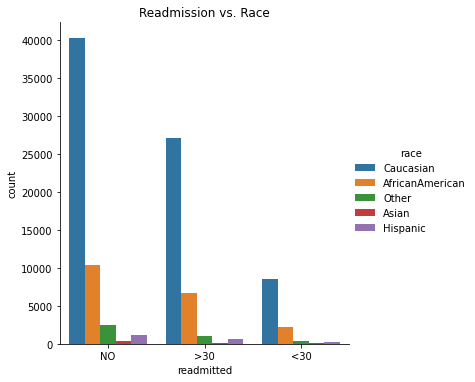

In [100]:
sns.catplot(x='readmitted', hue = 'race', data=df, kind = 'count');
plt.title("Readmission vs. Race");

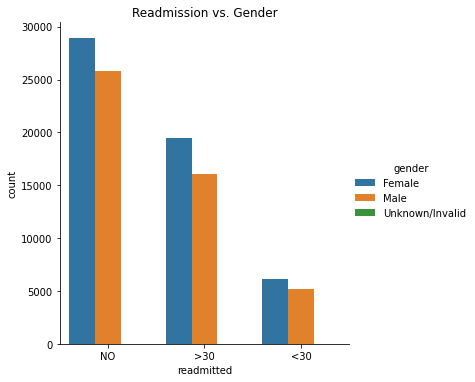

In [40]:
sns.catplot(x='readmitted', hue = 'gender', data=df, kind = 'count');
plt.title("Readmission vs. Gender");

In [6]:
df.gender.value_counts()

Female             54600
Male               46980
Unknown/Invalid        3
Name: gender, dtype: int64

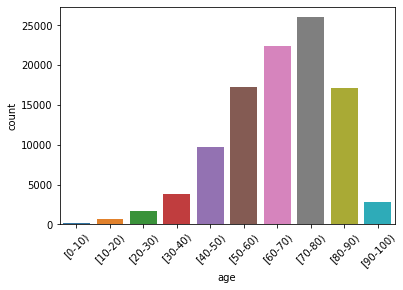

In [7]:
sns.countplot(x='age', data=df);
plt.xticks(rotation = 45);

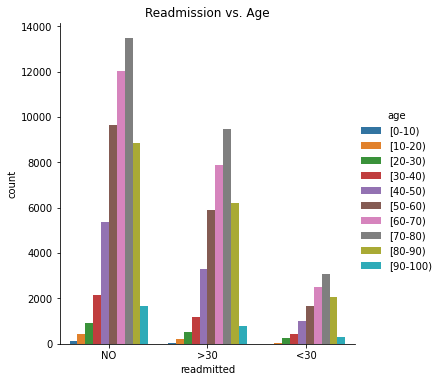

In [44]:
sns.catplot(x='readmitted', hue = 'age', data=df, kind = 'count');
plt.title("Readmission vs. Age");

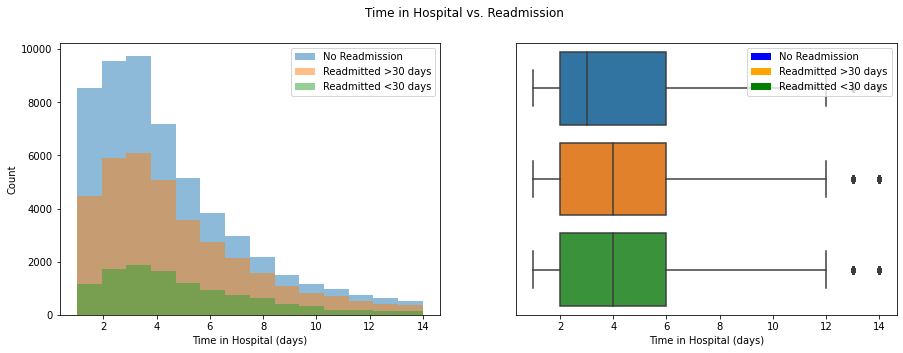

In [75]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(df[df["readmitted"]=='NO']["time_in_hospital"], bins=14, alpha=0.5, label="No Readmission")
ax1.hist(df[df["readmitted"]=='>30']["time_in_hospital"], bins=14, alpha=0.5, label="Readmitted >30 days")
ax1.hist(df[df["readmitted"]=='<30']["time_in_hospital"], bins=14, alpha=0.5, label="Readmitted <30 days")

ax1.set_xlabel("Time in Hospital (days)")
ax1.set_ylabel("Count")
ax1.legend()


sns.boxplot(x="time_in_hospital", y="readmitted", data=df, orient="h", ax=ax2)
ax2.get_yaxis().set_visible(False)
ax2.set_xlabel("Time in Hospital (days)")
color_patches = [Patch(facecolor="blue", label="No Readmission"),Patch(facecolor="orange", label="Readmitted >30 days"),Patch(facecolor="green", label="Readmitted <30 days")]
ax2.legend(handles=color_patches, loc = 'upper right')

fig.suptitle("Time in Hospital vs. Readmission")
fig.set_size_inches(15, 5);

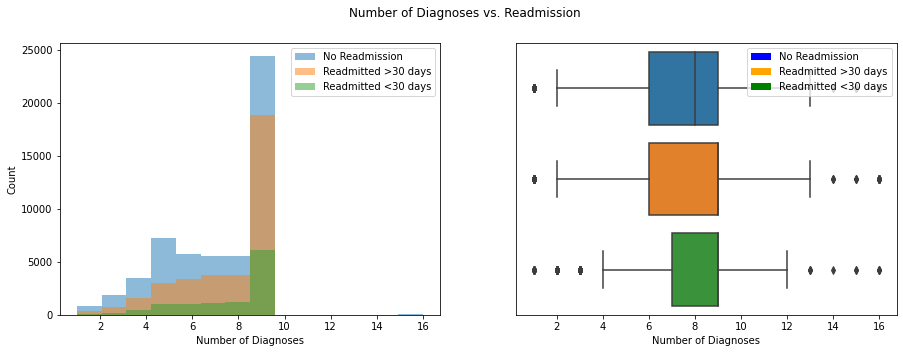

In [77]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(df[df["readmitted"]=='NO']["number_diagnoses"], bins=14, alpha=0.5, label="No Readmission")
ax1.hist(df[df["readmitted"]=='>30']["number_diagnoses"], bins=14, alpha=0.5, label="Readmitted >30 days")
ax1.hist(df[df["readmitted"]=='<30']["number_diagnoses"], bins=14, alpha=0.5, label="Readmitted <30 days")

ax1.set_xlabel('Number of Diagnoses')
ax1.set_ylabel("Count")
ax1.legend()


sns.boxplot(x="number_diagnoses", y="readmitted", data=df, orient="h", ax=ax2)
ax2.get_yaxis().set_visible(False)
ax2.set_xlabel('Number of Diagnoses')
color_patches = [Patch(facecolor="blue", label="No Readmission"),Patch(facecolor="orange", label="Readmitted >30 days"),Patch(facecolor="green", label="Readmitted <30 days")]
ax2.legend(handles=color_patches, loc = 'upper right')

fig.suptitle("Number of Diagnoses vs. Readmission")
fig.set_size_inches(15, 5);

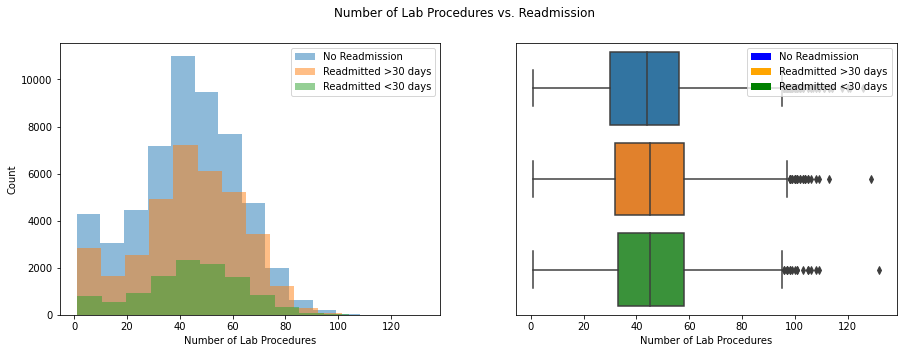

In [78]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(df[df["readmitted"]=='NO']["num_lab_procedures"], bins=14, alpha=0.5, label="No Readmission")
ax1.hist(df[df["readmitted"]=='>30']["num_lab_procedures"], bins=14, alpha=0.5, label="Readmitted >30 days")
ax1.hist(df[df["readmitted"]=='<30']["num_lab_procedures"], bins=14, alpha=0.5, label="Readmitted <30 days")

ax1.set_xlabel('Number of Lab Procedures')
ax1.set_ylabel("Count")
ax1.legend()


sns.boxplot(x="num_lab_procedures", y="readmitted", data=df, orient="h", ax=ax2)
ax2.get_yaxis().set_visible(False)
ax2.set_xlabel('Number of Lab Procedures')
color_patches = [Patch(facecolor="blue", label="No Readmission"),Patch(facecolor="orange", label="Readmitted >30 days"),Patch(facecolor="green", label="Readmitted <30 days")]
ax2.legend(handles=color_patches, loc = 'upper right')

fig.suptitle("Number of Lab Procedures vs. Readmission")
fig.set_size_inches(15, 5);

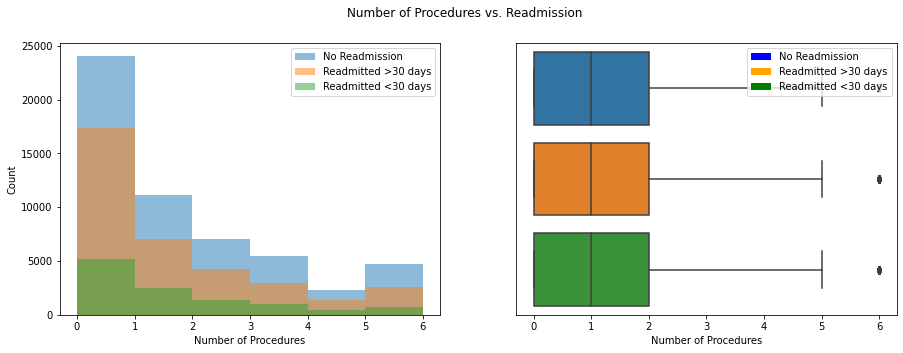

In [90]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(df[df["readmitted"]=='NO']["num_procedures"], bins=6, alpha=0.5, label="No Readmission")
ax1.hist(df[df["readmitted"]=='>30']["num_procedures"], bins=6, alpha=0.5, label="Readmitted >30 days")
ax1.hist(df[df["readmitted"]=='<30']["num_procedures"], bins=6, alpha=0.5, label="Readmitted <30 days")

ax1.set_xlabel('Number of Procedures')
ax1.set_ylabel("Count")
ax1.legend()


sns.boxplot(x="num_procedures", y="readmitted", data=df, orient="h", ax=ax2)
ax2.get_yaxis().set_visible(False)
ax2.set_xlabel('Number of Procedures')
color_patches = [Patch(facecolor="blue", label="No Readmission"),Patch(facecolor="orange", label="Readmitted >30 days"),Patch(facecolor="green", label="Readmitted <30 days")]
ax2.legend(handles=color_patches, loc = 'upper right')

fig.suptitle("Number of Procedures vs. Readmission")
fig.set_size_inches(15, 5);

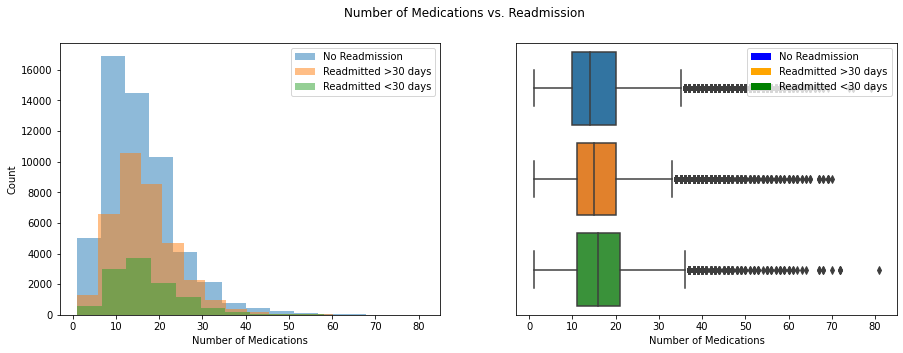

In [80]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(df[df["readmitted"]=='NO']["num_medications"], bins=14, alpha=0.5, label="No Readmission")
ax1.hist(df[df["readmitted"]=='>30']["num_medications"], bins=14, alpha=0.5, label="Readmitted >30 days")
ax1.hist(df[df["readmitted"]=='<30']["num_medications"], bins=14, alpha=0.5, label="Readmitted <30 days")

ax1.set_xlabel('Number of Medications')
ax1.set_ylabel("Count")
ax1.legend()


sns.boxplot(x="num_medications", y="readmitted", data=df, orient="h", ax=ax2)
ax2.get_yaxis().set_visible(False)
ax2.set_xlabel('Number of Medications')
color_patches = [Patch(facecolor="blue", label="No Readmission"),Patch(facecolor="orange", label="Readmitted >30 days"),Patch(facecolor="green", label="Readmitted <30 days")]
ax2.legend(handles=color_patches, loc = 'upper right')

fig.suptitle("Number of Medications vs. Readmission")
fig.set_size_inches(15, 5);

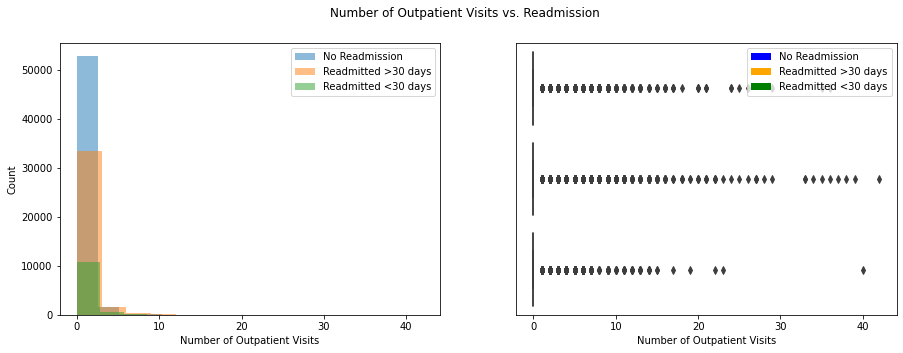

In [89]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(df[df["readmitted"]=='NO']["number_outpatient"], bins=14, alpha=0.5, label="No Readmission")
ax1.hist(df[df["readmitted"]=='>30']["number_outpatient"], bins=14, alpha=0.5, label="Readmitted >30 days")
ax1.hist(df[df["readmitted"]=='<30']["number_outpatient"], bins=14, alpha=0.5, label="Readmitted <30 days")

ax1.set_xlabel('Number of Outpatient Visits')
ax1.set_ylabel("Count")
ax1.legend()


sns.boxplot(x="number_outpatient", y="readmitted", data=df, orient="h", ax=ax2)
ax2.get_yaxis().set_visible(False)
ax2.set_xlabel('Number of Outpatient Visits')
color_patches = [Patch(facecolor="blue", label="No Readmission"),Patch(facecolor="orange", label="Readmitted >30 days"),Patch(facecolor="green", label="Readmitted <30 days")]
ax2.legend(handles=color_patches, loc = 'upper right')

fig.suptitle("Number of Outpatient Visits vs. Readmission")
fig.set_size_inches(15, 5);

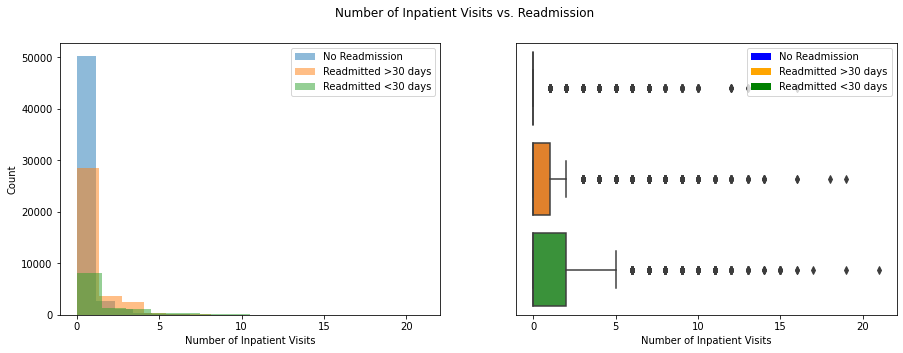

In [84]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(df[df["readmitted"]=='NO']["number_inpatient"], bins=14, alpha=0.5, label="No Readmission")
ax1.hist(df[df["readmitted"]=='>30']["number_inpatient"], bins=14, alpha=0.5, label="Readmitted >30 days")
ax1.hist(df[df["readmitted"]=='<30']["number_inpatient"], bins=14, alpha=0.5, label="Readmitted <30 days")

ax1.set_xlabel('Number of Inpatient Visits')
ax1.set_ylabel("Count")
ax1.legend()


sns.boxplot(x="number_inpatient", y="readmitted", data=df, orient="h", ax=ax2)
ax2.get_yaxis().set_visible(False)
ax2.set_xlabel('Number of Inpatient Visits')
color_patches = [Patch(facecolor="blue", label="No Readmission"),Patch(facecolor="orange", label="Readmitted >30 days"),Patch(facecolor="green", label="Readmitted <30 days")]
ax2.legend(handles=color_patches, loc = 'upper right')

fig.suptitle("Number of Inpatient Visits vs. Readmission")
fig.set_size_inches(15, 5);

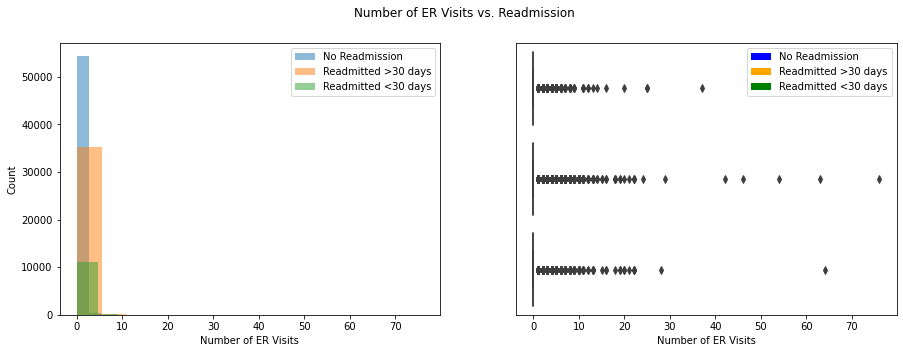

In [85]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(df[df["readmitted"]=='NO']["number_emergency"], bins=14, alpha=0.5, label="No Readmission")
ax1.hist(df[df["readmitted"]=='>30']["number_emergency"], bins=14, alpha=0.5, label="Readmitted >30 days")
ax1.hist(df[df["readmitted"]=='<30']["number_emergency"], bins=14, alpha=0.5, label="Readmitted <30 days")

ax1.set_xlabel('Number of ER Visits')
ax1.set_ylabel("Count")
ax1.legend()


sns.boxplot(x="number_emergency", y="readmitted", data=df, orient="h", ax=ax2)
ax2.get_yaxis().set_visible(False)
ax2.set_xlabel('Number of ER Visits')
color_patches = [Patch(facecolor="blue", label="No Readmission"),Patch(facecolor="orange", label="Readmitted >30 days"),Patch(facecolor="green", label="Readmitted <30 days")]
ax2.legend(handles=color_patches, loc = 'upper right')

fig.suptitle("Number of ER Visits vs. Readmission")
fig.set_size_inches(15, 5);

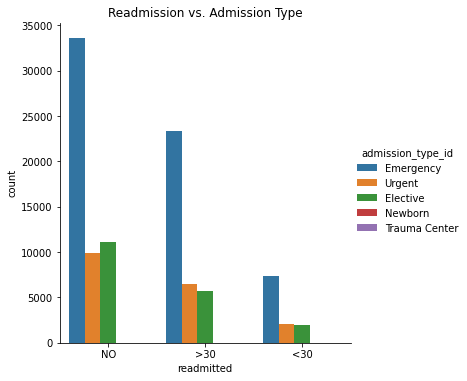

In [91]:
sns.catplot(x='readmitted', hue = 'admission_type_id', data=df, kind = 'count');
plt.title("Readmission vs. Admission Type");

In [19]:
df['discharge_disposition_id'].value_counts()

Discharged to home                                                                                           64784
Discharged/transferred to SNF                                                                                13924
Discharged/transferred to home with home health service                                                      12897
Discharged/transferred to another short term hospital                                                         2125
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1990
Expired                                                                                                       1642
Discharged/transferred to another type of inpatient care institution                                          1182
Discharged/transferred to ICF                                                                                  810
Left AMA                                                                        

In [20]:
discharge_disposition_grouped = {'Discharged to home':'Home', 
                                 'Discharged/transferred to SNF': 'Other Healthcare Facility',
                                 'Discharged/transferred to home with home health service':'Home',
                                 'Discharged/transferred to another short term hospital':'Hospital',
                                 'Discharged/transferred to another rehab fac including rehab units of a hospital .':'Other Healthcare Facility',
                                 'Expired':'Patient Death',
                                 'Discharged/transferred to another type of inpatient care institution':'Other Healthcare Facility',
                                 'Discharged/transferred to ICF':'Other Healthcare Facility',
                                 'Discharged/transferred to a long term care hospital.':'Other Healthcare Facility',
                                 'Hospice / home':'Home',
                                 'Hospice / medical facility':'Other Healthcare Facility',
                                 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital':'Other Healthcare Facility',
                                 'Discharged/transferred to home under care of Home IV provider':'Home',
                                 'Discharged/transferred within this institution to Medicare approved swing bed':'Hospital',
                                 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.':'Other Healthcare Facility',
                                 'Admitted as an inpatient to this hospital':'Hospital',
                                 'Discharged/transferred/referred to this institution for outpatient services':'Other Healthcare Facility',
                                 'Discharged/transferred/referred another institution for outpatient services':'Other Healthcare Facility',
                                 'Expired at home. Medicaid only, hospice.':'Patient Death',
                                 'Neonate discharged to another hospital for neonatal aftercare':'Hospital',
                                 'Discharged/transferred to a federal health care facility.':'Other Healthcare Facility',
                                 'Still patient or expected to return for outpatient services':'Other Healthcare Facility',
                                 'Expired in a medical facility. Medicaid only, hospice.':'Patient Death'}

In [21]:
df['discharge_disposition_id'] =  df['discharge_disposition_id'].astype(str).replace(discharge_disposition_grouped)

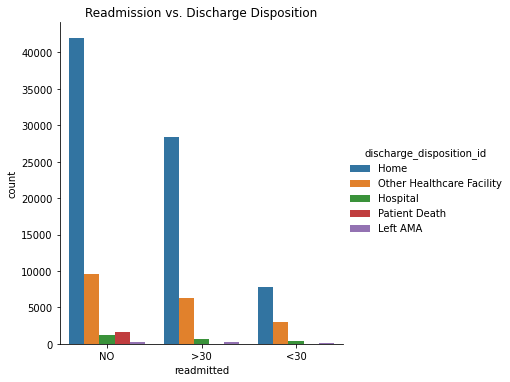

In [92]:
sns.catplot(x='readmitted', hue = 'discharge_disposition_id', data=df, kind = 'count');
plt.title("Readmission vs. Discharge Disposition");

In [24]:
df['admission_source_id'].value_counts()

 Emergency Room                                               64528
 Physician Referral                                           29509
Transfer from a hospital                                       3179
 Transfer from another health care facility                    2180
Clinic Referral                                                1104
 Transfer from a Skilled Nursing Facility (SNF)                 854
HMO Referral                                                    186
 Court/Law Enforcement                                           16
 Transfer from hospital inpt/same fac reslt in a sep claim       12
 Transfer from critial access hospital                            8
Normal Delivery                                                   2
 Extramural Birth                                                 2
 Transfer from Ambulatory Surgery Center                          2
 Sick Baby                                                        1
Name: admission_source_id, dtype: int64

In [25]:
admission_source_grouped = {' Physician Referral':'External Referral',
                            'Transfer from a hospital':'Hospital Transfer',
                            ' Transfer from another health care facility':'Healthcare Facility Transfer',
                            'Clinic Referral':'Internal Referral',
                            ' Transfer from a Skilled Nursing Facility (SNF)':'Healthcare Facility Transfer',
                            'HMO Referral':'External Referral',
                            ' Transfer from hospital inpt/same fac reslt in a sep claim':'Hospital Transfer',
                            ' Transfer from critial access hospital':'Hospital Transfer',
                            ' Transfer from Ambulatory Surgery Center':'Healthcare Facility Transfer'}

In [26]:
df['admission_source_id'] =  df['admission_source_id'].astype(str).replace(admission_source_grouped)

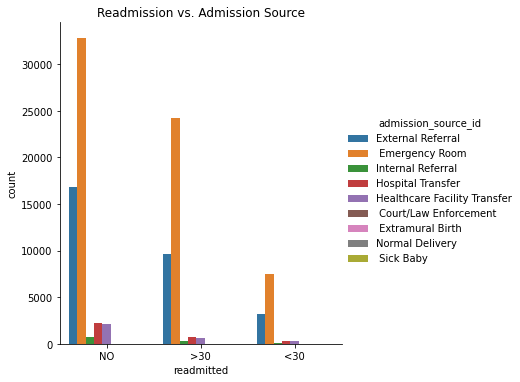

In [93]:
sns.catplot(x='readmitted', hue = 'admission_source_id', data=df, kind = 'count');
plt.title("Readmission vs. Admission Source");

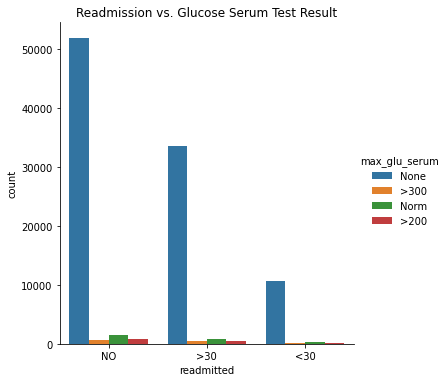

In [101]:
sns.catplot(x='readmitted', hue = 'max_glu_serum', data=df, kind = 'count');
plt.title("Readmission vs. Glucose Serum Test Result");

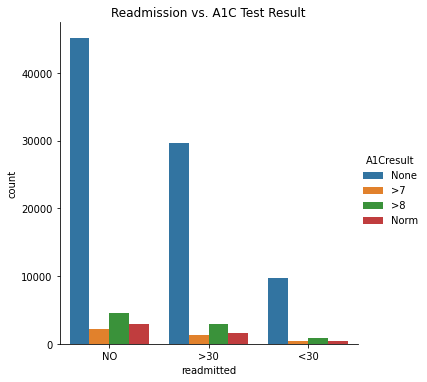

In [102]:
sns.catplot(x='readmitted', hue = 'A1Cresult', data=df, kind = 'count');
plt.title("Readmission vs. A1C Test Result");

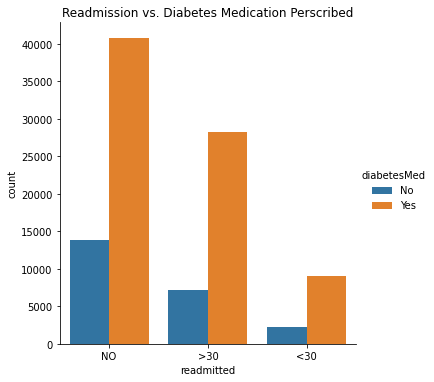

In [103]:
sns.catplot(x='readmitted', hue = 'diabetesMed', data=df, kind = 'count');
plt.title("Readmission vs. Diabetes Medication Perscribed");

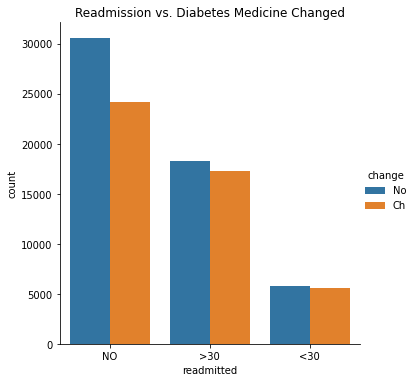

In [104]:
sns.catplot(x='readmitted', hue = 'change', data=df, kind = 'count');
plt.title("Readmission vs. Diabetes Medicine Changed");

In [32]:
medications=['metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide', 
             'glipizide','glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', 
             'troglitazone', 'tolazamide', 'insulin','glyburide-metformin', 'glipizide-metformin',
             'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


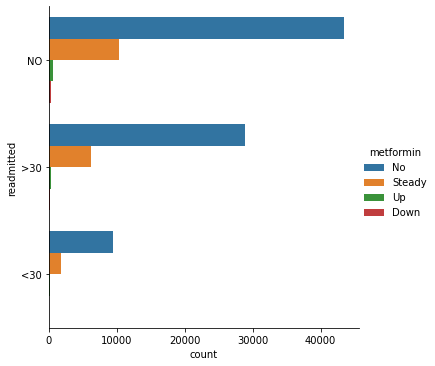

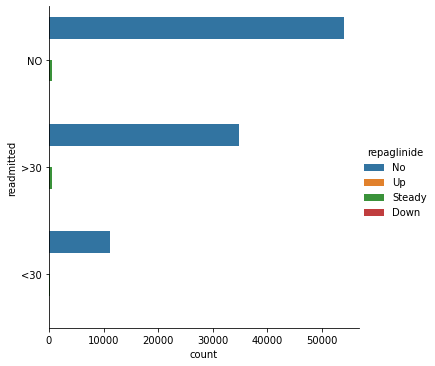

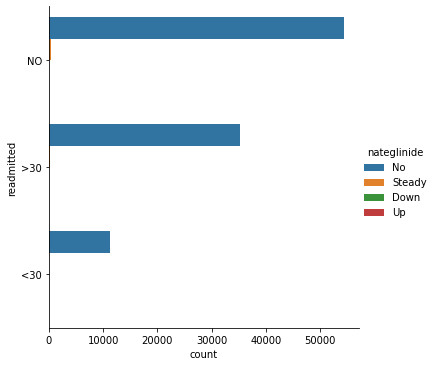

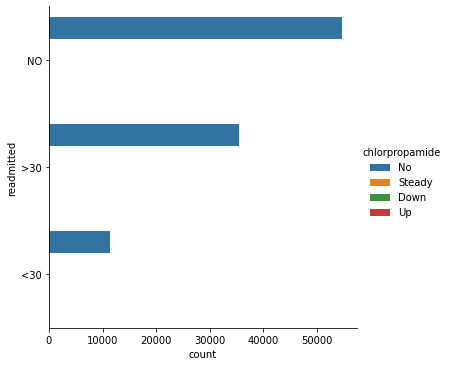

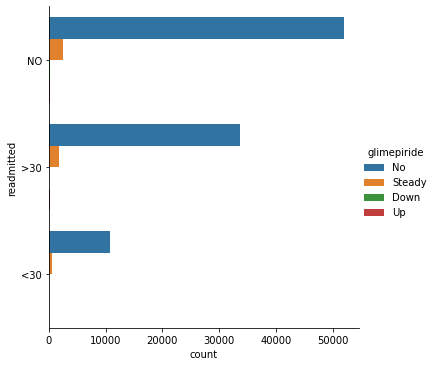

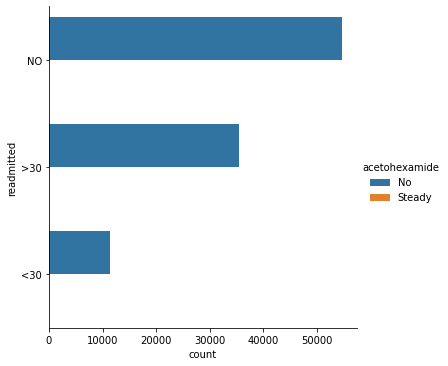

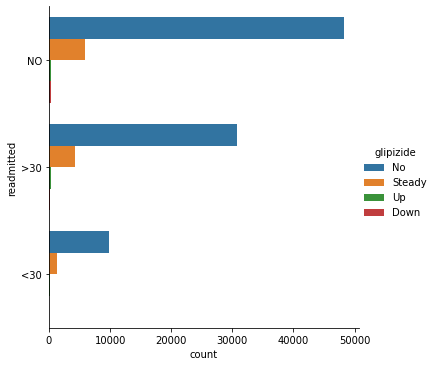

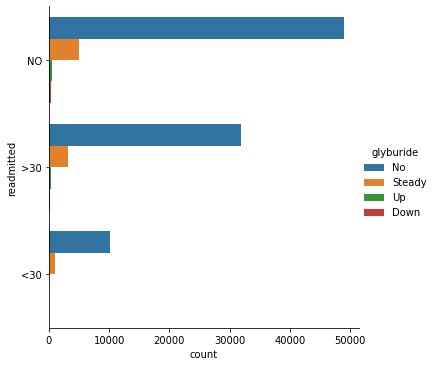

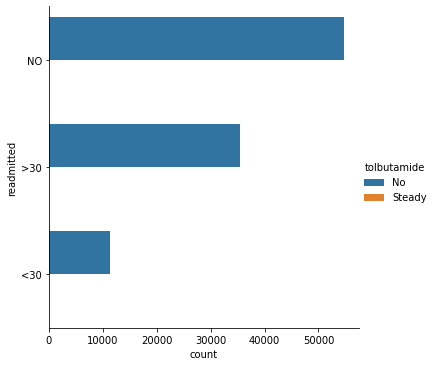

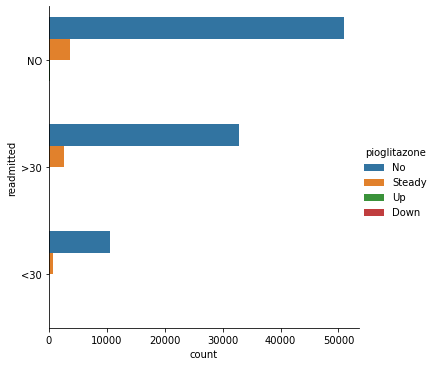

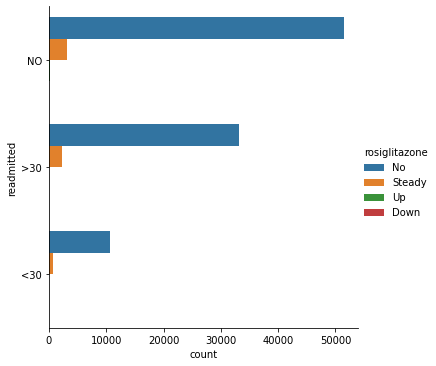

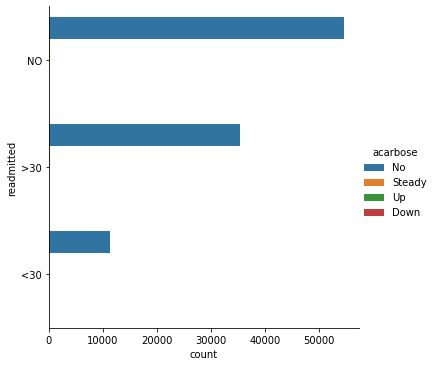

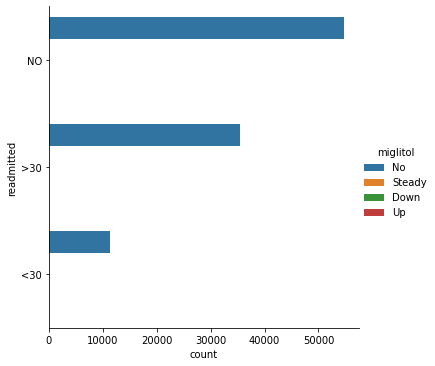

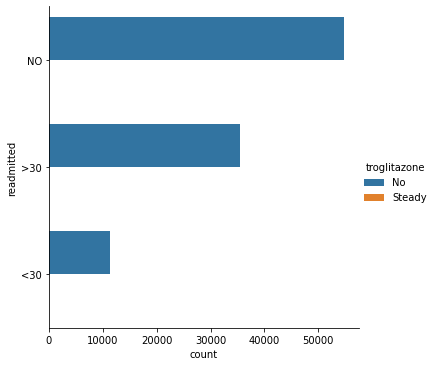

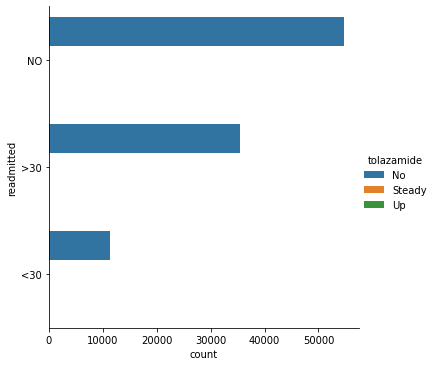

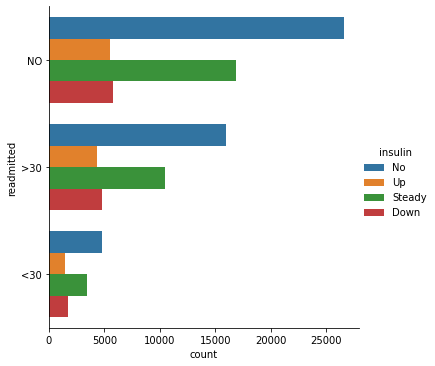

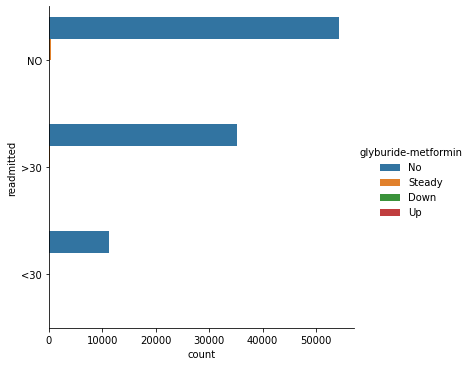

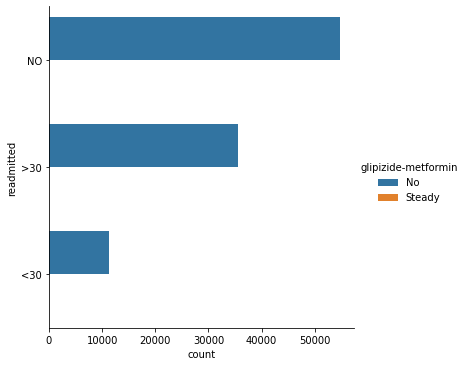

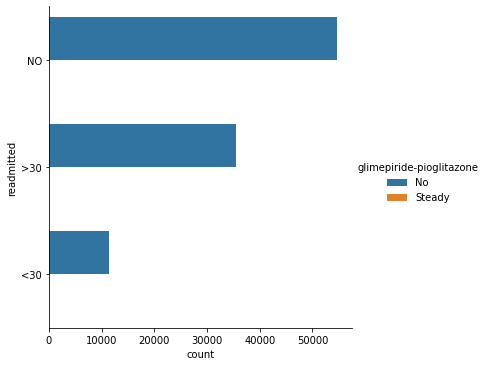

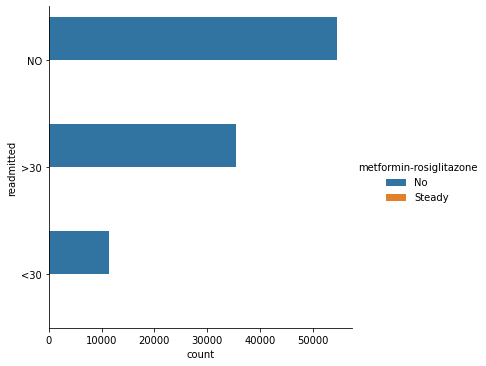

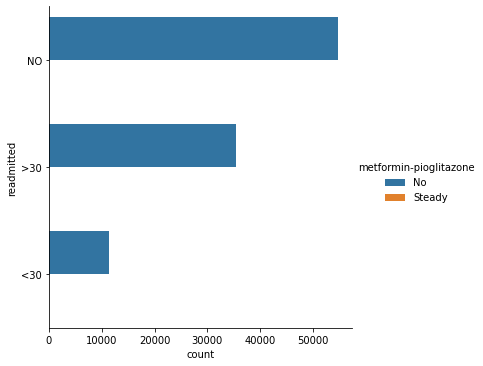

In [108]:
fig, ax =plt.subplots(len(medications),1)

fig.set_size_inches(10, 60)

for i in medications:
    sns.catplot(y='readmitted', hue = i, kind = 'count', data=df);
    ax[medications.index(i)].set_xlim(0,110000)
    plt.close(1)